In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import scipy.stats as stats


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [4]:
url='http://localhost:8888/?token=b4554cf0228210c9ee459ff080dd3e5ddc4f4c926d2a2308'

In [12]:
df=pd.read_clipboard(sep=",")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [14]:
train=pd.read_clipboard(sep=',')

In [8]:
train

NameError: name 'train' is not defined

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29651 entries, 0 to 29650
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     29651 non-null  int64  
 1   Product_ID                  29651 non-null  object 
 2   Gender                      29651 non-null  object 
 3   Age                         29651 non-null  object 
 4   Occupation                  29651 non-null  int64  
 5   City_Category               29651 non-null  object 
 6   Stay_In_Current_City_Years  29651 non-null  object 
 7   Marital_Status              29651 non-null  int64  
 8   Product_Category_1          29651 non-null  int64  
 9   Product_Category_2          29651 non-null  float64
 10  Product_Category_3          29651 non-null  float64
 11  Purchase                    29650 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.7+ MB


In [26]:
train.isnull().sum()*100/len(train)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.000000
Purchase                      0.003373
dtype: float64

In [18]:
test=df.copy()

In [23]:
test.isnull().sum()*100/len(test)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [25]:
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0])
train['Product_Category_3']=train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0])

In [27]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0])
test['Product_Category_3']=test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0])

<AxesSubplot:>

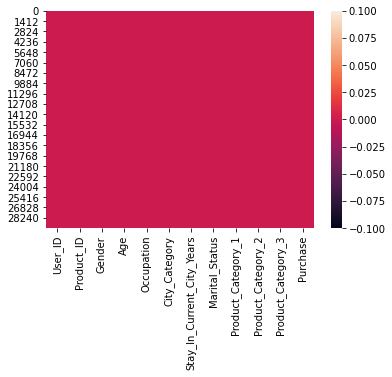

In [35]:
sns.heatmap(train.isnull())

<AxesSubplot:>

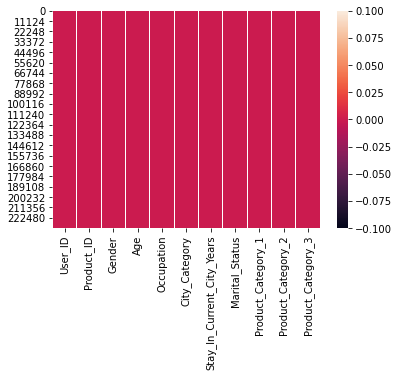

In [30]:
sns.heatmap(test.isnull())

In [33]:
train['Purchase']=train['Purchase'].fillna(train['Purchase'].mean())

In [34]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [36]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [73]:
train.replace(9255.163035413154,9255.0,inplace=True)

In [77]:
numerical_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(train[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in train.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 5
Continuous feature Count 2
Categorical feature Count 5


In [78]:
numerical_feature

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [79]:
discrete_feature

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [80]:
categorical_feature

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [81]:
continuous_feature

['User_ID', 'Purchase']

In [83]:
train['Age'].value_counts()

26-35    11720
36-45     5873
18-25     5665
46-50     2365
51-55     2121
55+       1151
0-17       755
Name: Age, dtype: int64

In [84]:
train['Age']=np.where(train['Age']=='0-17','Teens',train['Age'])

In [125]:
train['Age']=np.where(train['Age']=='18-25','Adolescense',train['Age'])
train['Age']=np.where(train['Age']=='26-35','Adult',train['Age'])
train['Age']=np.where(train['Age']=='36-45','Adult',train['Age'])
train['Age']=np.where(train['Age']=='46-50','Adult',train['Age'])
train['Age']=np.where(train['Age']=='51-55','Old Age',train['Age'])
train['Age']=np.where(train['Age']=='55+','Old Age',train['Age'])


In [87]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Teens,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,Teens,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,Teens,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,Teens,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,Old Age,16,C,4+,0,8,8.0,16.0,7969.0


In [92]:
test['Age'].value_counts()

Adult          159716
Adolescense     42293
Old Age         25358
Teens            6232
Name: Age, dtype: int64

In [91]:
test['Age']=np.where(test['Age']=='0-17','Teens',test['Age'])
test['Age']=np.where(test['Age']=='18-25','Adolescense',test['Age'])
test['Age']=np.where(test['Age']=='26-35','Adult',test['Age'])
test['Age']=np.where(test['Age']=='46-50','Adult',test['Age'])
test['Age']=np.where(test['Age']=='51-55','Old Age',test['Age'])
test['Age']=np.where(test['Age']=='55+','Old Age',test['Age'])


In [93]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,Adult,7,B,2,1,1,11.0,16.0
1,1000009,P00113442,M,Adult,17,C,0,0,3,5.0,16.0
2,1000010,P00288442,F,Adult,1,B,4+,1,5,14.0,16.0
3,1000010,P00145342,F,Adult,1,B,4+,1,4,9.0,16.0
4,1000011,P00053842,F,Adult,1,C,1,0,4,5.0,12.0


In [127]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [128]:
train.columns=['Gender','Age_Category','Occupation','City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status','Product_Category_1',
       'Product_Category_2','Product_Category_3','Purchase']

In [96]:
train.head()

,User_ID,Product_ID,Gender,Age_category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Teens,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,Teens,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,Teens,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,Teens,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,Old Age,16,C,4+,0,8,8.0,16.0,7969.0


In [97]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [98]:
test.columns=['User_ID','Product_ID','Gender','Age_Category','Occupation','City_Category',
       'Stay_In_Current_City_Years','Marital_Status','Product_Category_1',
       'Product_Category_2','Product_Category_3']

In [100]:
test.head()

,User_ID,Product_ID,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,Adult,7,B,2,1,1,11.0,16.0
1,1000009,P00113442,M,Adult,17,C,0,0,3,5.0,16.0
2,1000010,P00288442,F,Adult,1,B,4+,1,5,14.0,16.0
3,1000010,P00145342,F,Adult,1,B,4+,1,4,9.0,16.0
4,1000011,P00053842,F,Adult,1,C,1,0,4,5.0,12.0


In [101]:
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [102]:
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [103]:
train.head()

,Gender,Age_category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,Teens,10,A,2,0,3,8.0,16.0,8370.0
1,F,Teens,10,A,2,0,1,6.0,14.0,15200.0
2,F,Teens,10,A,2,0,12,8.0,16.0,1422.0
3,F,Teens,10,A,2,0,12,14.0,16.0,1057.0
4,M,Old Age,16,C,4+,0,8,8.0,16.0,7969.0


In [130]:
print(train['Gender'].value_counts())
print(train['Age_Category'].value_counts())
print(train['Occupation'].value_counts())
print(train['Stay_In_Current_City_Years'].value_counts())
print(train['Marital_Status'].value_counts())

M    22863
F     6787
Name: Gender, dtype: int64
Adult          19958
Adolescense     5665
Old Age         3272
Teens            755
Name: Age_Category, dtype: int64
4     3983
0     3700
7     3187
17    2280
1     2159
20    1945
12    1713
14    1526
16    1334
2     1288
3     1074
6     1033
10     691
5      675
11     653
15     623
19     469
13     469
18     418
9      336
8       94
Name: Occupation, dtype: int64
1     10429
2      5372
3      5202
4+     4580
0      4067
Name: Stay_In_Current_City_Years, dtype: int64
0    17983
1    11667
Name: Marital_Status, dtype: int64


In [120]:
print(test['Gender'].value_counts())
print(test['Age_Category'].value_counts())
print(test['Occupation'].value_counts())
print(test['Stay_In_Current_City_Years'].value_counts())
print(test['Marital_Status'].value_counts())

M    175772
F     57827
Name: Gender, dtype: int64
Adult          159716
Adolescense     42293
Old Age         25358
Teens            6232
Name: Age_Category, dtype: int64
4     30778
0     29212
7     24994
1     20261
17    17375
20    14278
12    13269
14    11473
2     11408
16    10751
6      8747
3      7476
10     5374
5      5196
15     5191
11     5007
19     3458
13     3325
18     2745
9      2638
8       643
Name: Occupation, dtype: int64
1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64
0    137807
1     95792
Name: Marital_Status, dtype: int64


<AxesSubplot:ylabel='Purchase'>

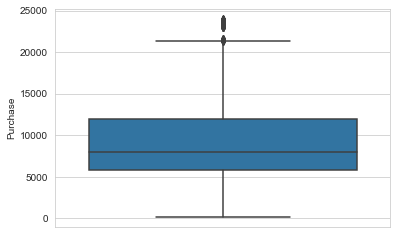

In [156]:
sns.boxplot(y=train['Purchase'])

In [157]:
IQR=train.Purchase.quantile(0.75)-train.Purchase.quantile(0.25)
lower_bridge=train.Purchase.quantile(0.25)-(IQR*1.5)
upper_bridge=train.Purchase.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3450.375 21300.625


In [162]:
outliers_of_purchase=train[(train['Purchase'] < -3450.375) | (train['Purchase'] > 21300.625)]

In [163]:
outliers_of_purchase

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,M,Adult,2,B,3,0,10,16.0,16.0,23603.0
375,F,Adult,3,A,1,0,10,13.0,16.0,23792.0
652,M,Adolescense,9,B,1,0,10,14.0,16.0,23233.0
736,F,Adult,20,C,2,0,10,15.0,16.0,23595.0
1041,F,Adult,2,B,1,0,10,15.0,16.0,23341.0
...,...,...,...,...,...,...,...,...,...,...
29086,M,Adult,5,C,1,1,10,8.0,16.0,23131.0
29129,M,Adult,12,C,1,0,10,15.0,16.0,23518.0
29222,M,Adult,14,A,0,0,10,15.0,16.0,23049.0
29267,M,Adult,12,C,4+,1,10,15.0,16.0,23287.0


In [164]:
train.drop(index=outliers_of_purchase.index,axis=0,inplace=True)

In [173]:
train.reset_index(drop=True,inplace=True)

In [174]:
train

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,Teens,10,A,2,0,3,8.0,16.0,8370.0
1,F,Teens,10,A,2,0,1,6.0,14.0,15200.0
2,F,Teens,10,A,2,0,12,8.0,16.0,1422.0
3,F,Teens,10,A,2,0,12,14.0,16.0,1057.0
4,M,Old Age,16,C,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
29511,M,Old Age,0,C,1,1,1,11.0,15.0,15252.0
29512,M,Old Age,0,C,1,1,5,14.0,16.0,5353.0
29513,M,Old Age,0,C,1,1,8,8.0,16.0,7927.0
29514,M,Old Age,0,C,1,1,8,17.0,16.0,9938.0


In [155]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

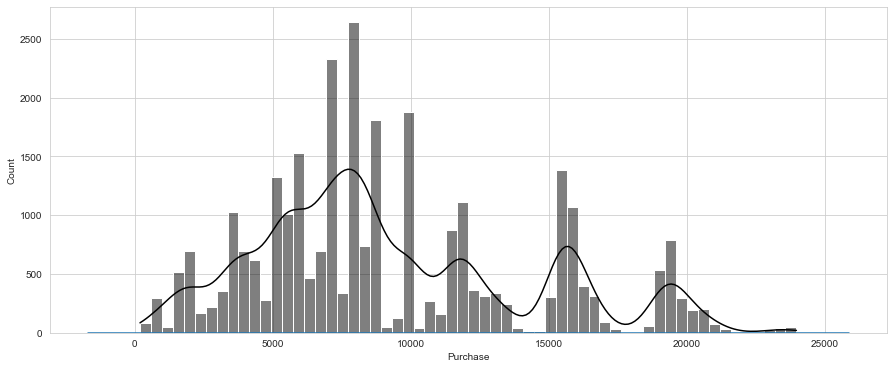

In [150]:
plt.figure(figsize=(15,6))
sns.histplot(train['Purchase'],kde=True,color='black')
sns.kdeplot(train['Purchase'])

((array([-4.0712838 , -3.85977962, -3.74423794, ...,  3.74423794,
          3.85977962,  4.0712838 ]),
  array([  185.,   186.,   187., ..., 23929., 23932., 23958.])),
 (4821.534283170958, 9255.299763912311, 0.9743242808415169))

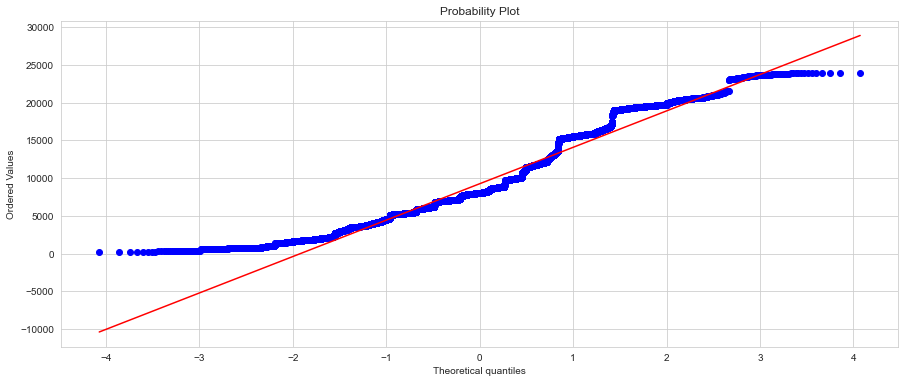

In [153]:
plt.figure(figsize=(15,6))
stats.probplot(train['Purchase'], dist="norm", plot=plt)

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

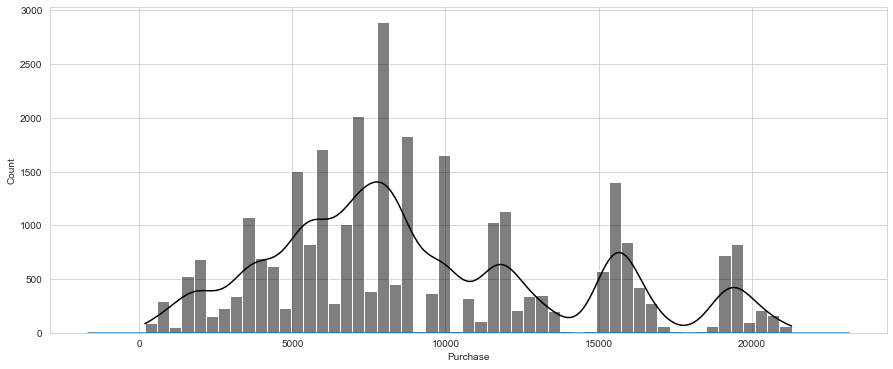

In [175]:
plt.figure(figsize=(15,6))
sns.histplot(train['Purchase'],kde=True,color='black')
sns.kdeplot(train['Purchase'])

((array([-4.07022872, -3.85867257, -3.74310038, ...,  3.74310038,
          3.85867257,  4.07022872]),
  array([  185.,   186.,   187., ..., 21277., 21287., 21299.])),
 (4743.065320144753, 9192.115699959346, 0.9740043530345154))

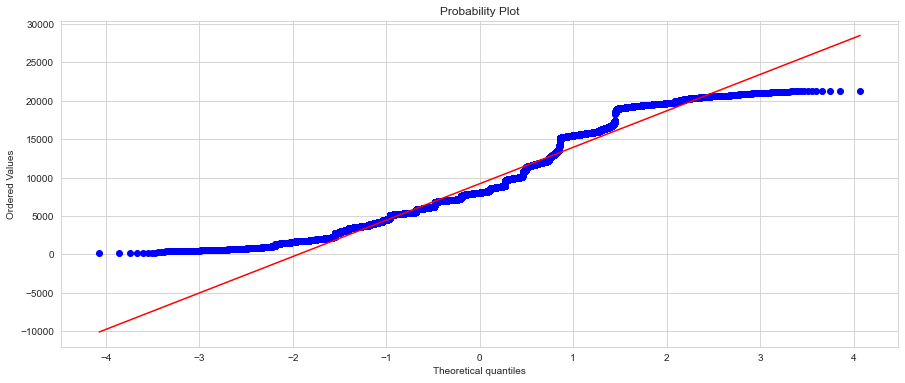

In [176]:
plt.figure(figsize=(15,6))
stats.probplot(train['Purchase'], dist="norm", plot=plt)

In [180]:
train.head()

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,Teens,10,A,2,0,3,8.0,16.0,8370.0
1,F,Teens,10,A,2,0,1,6.0,14.0,15200.0
2,F,Teens,10,A,2,0,12,8.0,16.0,1422.0
3,F,Teens,10,A,2,0,12,14.0,16.0,1057.0
4,M,Old Age,16,C,4+,0,8,8.0,16.0,7969.0


In [189]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
train['Gender']= label_encoder.fit_transform(train['Gender'])
print(train['Gender'].unique())

train['Age_Category']=label_encoder.fit_transform(train['Age_Category'])
print(train['Age_Category'].unique())

train['City_Category']=label_encoder.fit_transform(train['City_Category'])
print(train['City_Category'].unique())


[0 1]
[3 2 1 0]
[0 2 1]


In [186]:
train.head()

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,3,10,0,2,0,3,8.0,16.0,8370.0
1,0,3,10,0,2,0,1,6.0,14.0,15200.0
2,0,3,10,0,2,0,12,8.0,16.0,1422.0
3,0,3,10,0,2,0,12,14.0,16.0,1057.0
4,1,2,16,2,4+,0,8,8.0,16.0,7969.0


In [188]:
label_encoder = preprocessing.LabelEncoder()
 
test['Gender']= label_encoder.fit_transform(test['Gender'])
print(test['Gender'].unique())

test['Age_Category']=label_encoder.fit_transform(test['Age_Category'])
print(test['Age_Category'].unique())

test['City_Category']=label_encoder.fit_transform(test['City_Category'])
print(test['City_Category'].unique())


[1 0]
[1 0 2 3]
[1 2 0]


In [190]:
test.tail()

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,0,1,15,1,4+,1,8,8.0,16.0
233595,0,1,15,1,4+,1,5,8.0,16.0
233596,0,1,15,1,4+,1,1,5.0,12.0
233597,0,1,1,2,4+,0,10,16.0,16.0
233598,0,1,0,1,4+,1,4,5.0,16.0


In [208]:
train['Stay_In_Current_City_Years']=np.where(train['Stay_In_Current_City_Years']=='4+',4,train['Stay_In_Current_City_Years'])

In [210]:
test['Stay_In_Current_City_Years']=np.where(test['Stay_In_Current_City_Years']=='4+',4,test['Stay_In_Current_City_Years'])

In [209]:
final_train=train.copy()

In [211]:
final_test=test.copy()

In [199]:
train=final_train.copy()

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test= train_test_split(train.drop(['Purchase'],axis=1),train['Purchase'],test_size=0.3,random_state=0)

In [222]:
x_train

,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
22736,1,0,0,2,2,0,1,6.0,16.0
27017,1,1,0,1,4,0,1,8.0,17.0
12956,1,1,14,0,1,1,5,9.0,14.0
3709,1,1,7,1,1,0,8,8.0,16.0
19181,1,1,0,0,1,1,1,2.0,5.0
...,...,...,...,...,...,...,...,...,...
13123,0,1,14,2,3,0,2,8.0,16.0
19648,0,1,11,1,4,0,3,4.0,5.0
9845,1,0,19,0,3,0,1,16.0,16.0
10799,0,1,6,1,2,0,7,8.0,16.0


In [223]:
y_train

22736    19507.0
27017    19383.0
12956     5179.0
3709      7757.0
19181    19674.0
          ...   
13123     9558.0
19648     8210.0
9845     11973.0
10799    16761.0
2732     16544.0
Name: Purchase, Length: 20661, dtype: float64

In [224]:
from sklearn.linear_model import LinearRegression

In [229]:
from sklearn.metrics import confusion_matrix

In [225]:
LR=LinearRegression()

In [226]:
LR.fit(x_train,y_train)

LinearRegression()

In [234]:
y_pred1=LR.predict(x_test)

In [242]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [243]:
score=r2_score(y_test,y_pred1)

In [244]:
score

0.14300236863094806

In [245]:
RMSE=mean_squared_error(y_test,y_pred1)

In [246]:
RMSE

20390345.785535738